# An Analysis of Insurance Premiums

## This notebook will explore insurance premiums and attempt to predict premium charges from demographic information.

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set_palette("pastel")

In [2]:
df = pd.read_csv('../input/ushealthinsurancedataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check for missing values in the dataset.

In [5]:
df.isnull().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

We are all good!

# Age Analysis

In [6]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [7]:
np.median(df['age'])

39.0

Age ranges from 18 to 64. Average and median age is 39, and IQR is between ages 27 and 51. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


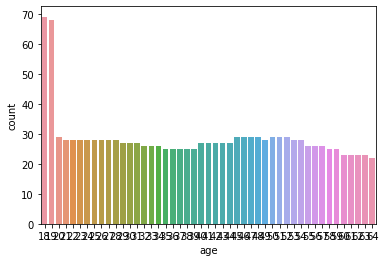

In [8]:
sns.countplot(df['age'])
plt.show()

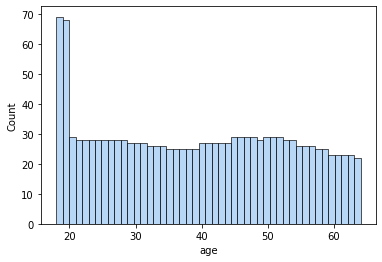

In [9]:
bins = 8
#print(bins)
ages_hist = sns.histplot(df['age'], bins=47)
plt.show()

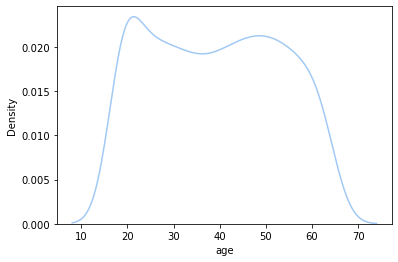

In [10]:
ages_kde = sns.kdeplot(df['age'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


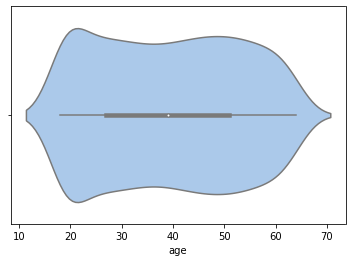

In [11]:
sns.violinplot(df['age'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

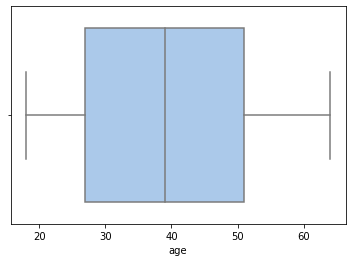

In [12]:
sns.boxplot(df['age'])

As we can see this appears to be a fairly uniform distribution, though the number of 18 year olds and 19 year olds is almost double the number of every other age group.

In [13]:
var_1 = df['age'][df['age']==18].value_counts()
var_2 = df['age'][df['age']==19].value_counts()
print('18 yrs: {} \n19 yrs: {}'.format(var_1, var_2))

18 yrs: 18    69
Name: age, dtype: int64 
19 yrs: 19    68
Name: age, dtype: int64


# Sex Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

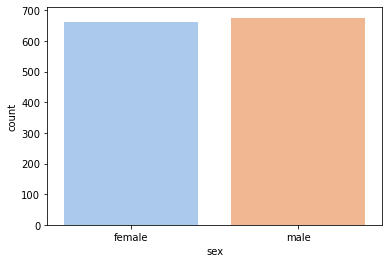

In [14]:
sns.countplot(df['sex'])

Even mix of female and male.  Nice.

# BMI Analysis

In [15]:
bmi = df['bmi']
bmi.head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

In [16]:
bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [17]:
np.median(bmi)

30.4

BMI ranges from ~16 to ~53.  The mean and median BMI are ~30.  The IQR falls between ~26 and ~35.  

<AxesSubplot:xlabel='bmi', ylabel='Density'>

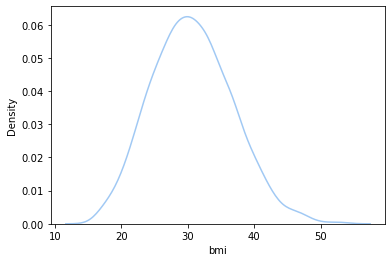

In [18]:
sns.kdeplot(bmi)

(array([ 13.,  17.,  47.,  80., 103., 131., 162., 157., 145., 143., 105.,
         90.,  54.,  42.,  20.,  12.,  10.,   4.,   1.,   2.]),
 array([15.96  , 17.8185, 19.677 , 21.5355, 23.394 , 25.2525, 27.111 ,
        28.9695, 30.828 , 32.6865, 34.545 , 36.4035, 38.262 , 40.1205,
        41.979 , 43.8375, 45.696 , 47.5545, 49.413 , 51.2715, 53.13  ]),
 <BarContainer object of 20 artists>)

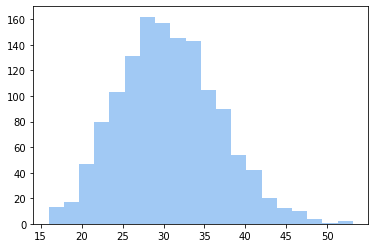

In [19]:
plt.hist(bmi, bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

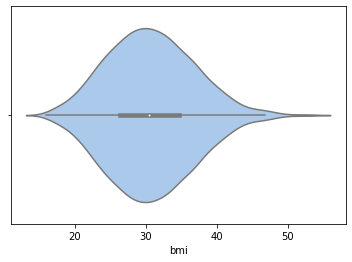

In [20]:
sns.violinplot(bmi)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

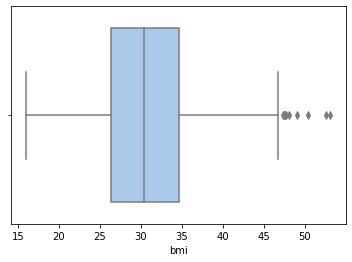

In [21]:
sns.boxplot(bmi)

The BMI feature follows a fairly standard distribution, as can be seen above.  BMI is ~30 on average, and we see seveeral outliers on the higher end past ~46

# Children Analysis

In [22]:
children = df[['children']]
children.head()

,children
0,0
1,1
2,3
3,0
4,0


In [23]:
children.describe()

,children
count,1338.000000
mean,1.094918
std,1.205493
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [24]:
np.median(children)

1.0

The number of children ranges from 0 to 5, with the IQR falling between 0 and 2.  The mean and median number of children is 1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='children', ylabel='count'>

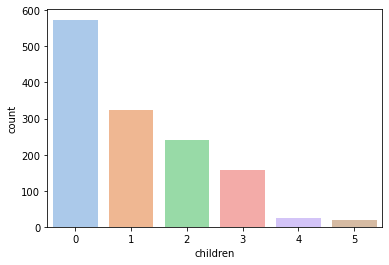

In [25]:
sns.countplot(df['children'])

We see the distribution of # of children is left-skewed, with most individuals having 0 children, with decreasing numbers having increasing numbers of children.

In [26]:
children.value_counts()

children
0           574
1           324
2           240
3           157
4            25
5            18
dtype: int64

# Smoker Analysis

In [27]:
smoker=df['smoker']
smoker.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [28]:
smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='smoker', ylabel='count'>

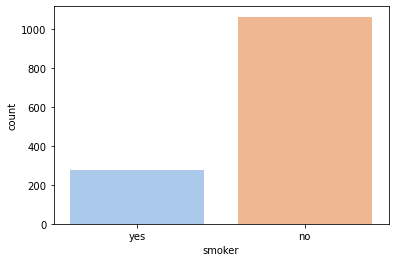

In [29]:
sns.countplot(df['smoker'])

In [30]:
smoker.value_counts()['no']/smoker.value_counts()['yes']

3.883211678832117

The majority of individuals are non-smokers, with non-smokers outweighing smokers by a factor of 3.88.  Woo hoo!

# Region Analysis

In [31]:
region = df['region']
region.head()

0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
Name: region, dtype: object

In [32]:
region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='region', ylabel='count'>

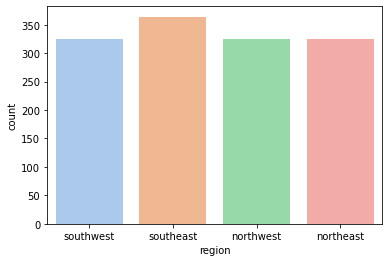

In [33]:
sns.countplot(region)

We have a nice even mix of the 4 different regions around the US.  Great representation!

# Charges Analysis

In [34]:
charges = df['charges']
charges.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [35]:
charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [36]:
np.median(charges)

9382.033

The hospital charges range from USD 1,122 to USD 63,770, with a mean of USD 13,270 but a median of USD 9,382.  Let's get a closer look.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

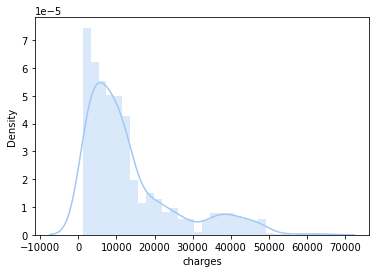

In [37]:
sns.distplot(charges)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='charges'>

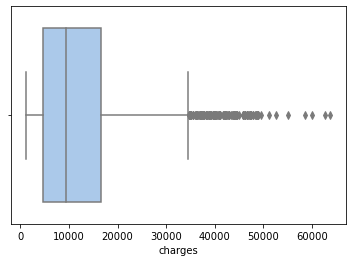

In [38]:
sns.boxplot(charges)

We can see heavy left-skew with the majority of charges falling below ~USD 20,000, with a slight uptick around the USD 40,000 - 50,000 range.  There are a very large number of outliers on the high end, at ~USD 35,000 and above.


# Bivariate Analysis (charges)

### Age

Using charges as our independent variable of interest, let's take a look at how charges vary with the features.

<AxesSubplot:xlabel='age', ylabel='charges'>

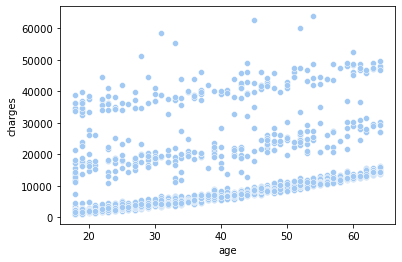

In [39]:
sns.scatterplot(x=df['age'], y=df['charges'])

Slight positive trend can be seen as age increases, charges tend to increase as well.

In [40]:
women = df[['sex', 'charges']][df['sex'] == 'female']
men = df[['sex', 'charges']][df['sex'] == 'male']

women_median = np.median(women['charges'])
men_median = np.median(men['charges'])
print('Median Charges for Men: ', men_median, '\nMedian Charges for Women: ', women_median, '\nDifference: ', women_median-men_median)

Median Charges for Men:  9369.61575 
Median Charges for Women:  9412.9625 
Difference:  43.34674999999879


<AxesSubplot:xlabel='sex', ylabel='charges'>

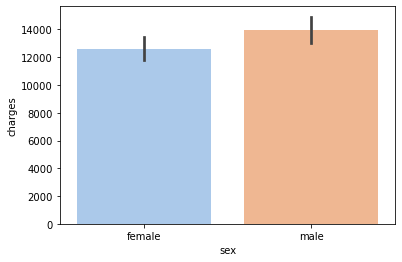

In [41]:
sns.barplot(data=df, x='sex', y='charges')

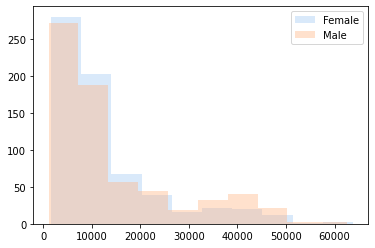

In [42]:
plt.hist(df['charges'][df['sex']=='female'], alpha=0.4, label='Female')
plt.hist(df['charges'][df['sex']=='male'], alpha=0.4, label='Male')
plt.legend()

<AxesSubplot:xlabel='sex', ylabel='charges'>

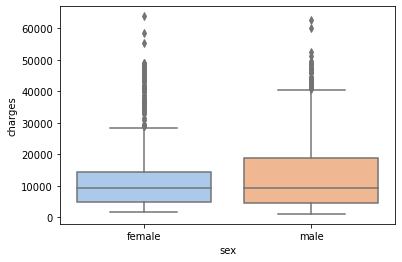

In [43]:
sns.boxplot(data=df, x='sex', y='charges')

We see that although males and females have roughly the same average charges, a higher percentage of males have higher charges than females, and the max value for charges is higher for males by ~USD 10,000

### BMI

<AxesSubplot:xlabel='bmi', ylabel='charges'>

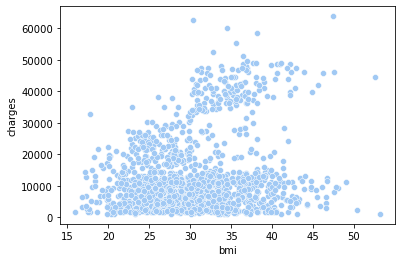

In [44]:
sns.scatterplot(x=df['bmi'], y=df['charges'])

We see more high-charge values with higher BMI values, but we can see heteroskedasticity in the data.

### Children

<AxesSubplot:xlabel='children', ylabel='charges'>

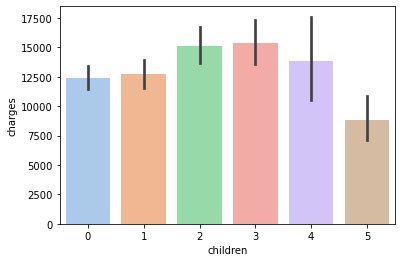

In [45]:
sns.barplot(data=df, x='children', y='charges')

<AxesSubplot:xlabel='children', ylabel='charges'>

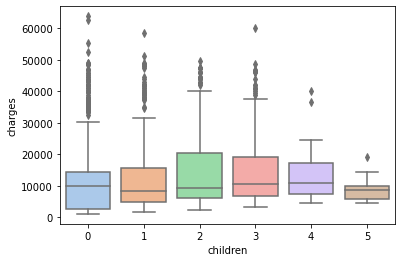

In [46]:
sns.boxplot(data=df, x='children', y='charges')

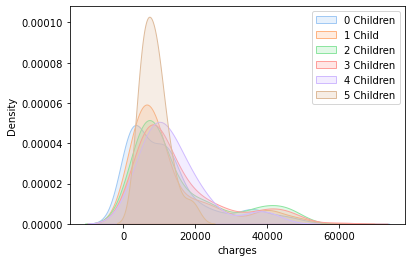

In [47]:
sns.kdeplot(df['charges'][df['children']==0], shade=True, label = '0 Children')
sns.kdeplot(df['charges'][df['children']==1], shade=True, label='1 Child')
sns.kdeplot(df['charges'][df['children']==2], shade=True, label='2 Children')
sns.kdeplot(df['charges'][df['children']==3], shade=True, label='3 Children')
sns.kdeplot(df['charges'][df['children']==4], shade=True, label='4 Children')
sns.kdeplot(df['charges'][df['children']==5], shade=True, label='5 Children')

plt.legend()

People with 5 children are concentrated around the ~USD 10,000 range with few outliers.  People with 2-4 children have the highest average and IQR for charges.

### Smoker

<AxesSubplot:xlabel='smoker', ylabel='charges'>

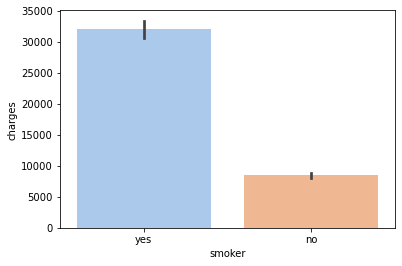

In [48]:
sns.barplot(data=df, x='smoker', y='charges')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

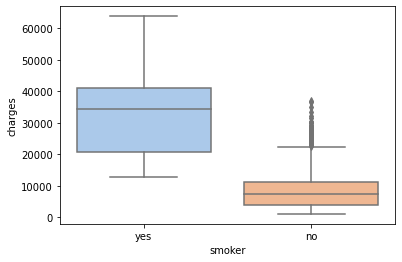

In [49]:
sns.boxplot(data=df, x='smoker', y='charges')

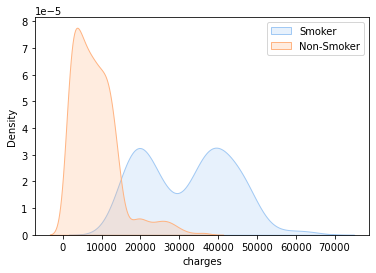

In [50]:
sns.kdeplot(df['charges'][df['smoker']=='yes'], shade=True, label='Smoker')
sns.kdeplot(df['charges'][df['smoker']=='no'], shade=True, label='Non-Smoker')

plt.legend()

We can clearly see the significantly higher charges for smokers vs non-smokers from the plots above.  Seems pretty intuitive, but something to keep in mind as we move forward.

### Region

<AxesSubplot:xlabel='region', ylabel='charges'>

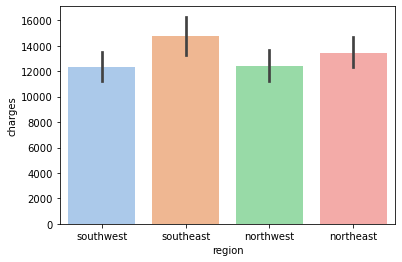

In [51]:
sns.barplot(data=df, x='region', y='charges')

<AxesSubplot:xlabel='region', ylabel='charges'>

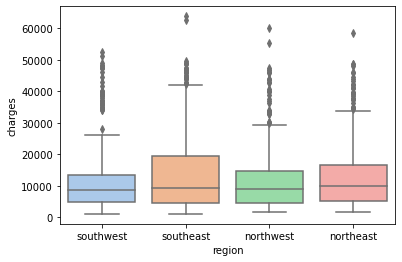

In [52]:
sns.boxplot(data=df, x='region', y='charges')

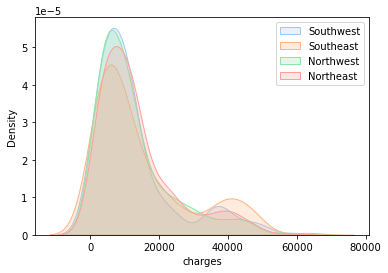

In [53]:
sns.kdeplot(df['charges'][df['region']=='southwest'], shade=True, label='Southwest')
sns.kdeplot(df['charges'][df['region']=='southeast'], shade=True, label='Southeast')
sns.kdeplot(df['charges'][df['region']=='northwest'], shade=True, label='Northwest')
sns.kdeplot(df['charges'][df['region']=='northeast'], shade=True, label='Northeast')

plt.legend()

The breakdown by region is fairly similar, though we see a bit higher concentration of high-charge values in the southeast region.

## Multivariate Analysis

<AxesSubplot:>

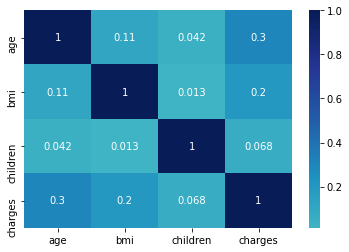

In [54]:
sns.heatmap(df.corr(), center=0, cmap='YlGnBu', robust=True, annot=True)

Let's take a look at age

<AxesSubplot:xlabel='age', ylabel='charges'>

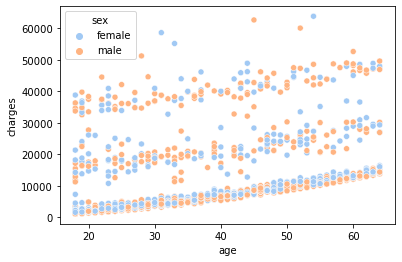

In [55]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex')

<AxesSubplot:xlabel='age', ylabel='charges'>

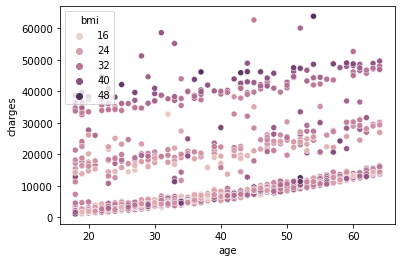

In [56]:
sns.scatterplot(data=df, x='age', y='charges', hue='bmi')

<AxesSubplot:xlabel='age', ylabel='charges'>

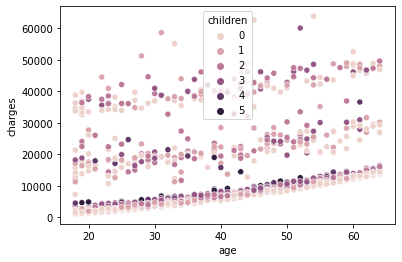

In [57]:
sns.scatterplot(data=df, x='age', y='charges', hue='children')

<AxesSubplot:xlabel='age', ylabel='charges'>

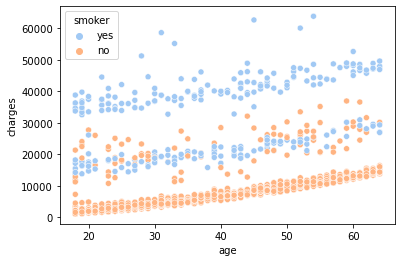

In [58]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

This chart clearly illustrates the higher charges that smokers typically pay regardless of age.

<AxesSubplot:xlabel='age', ylabel='charges'>

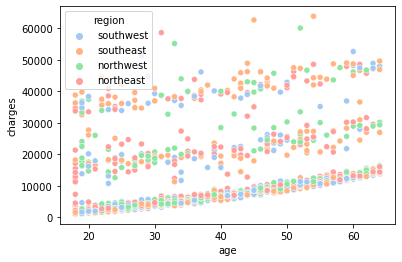

In [59]:
sns.scatterplot(data=df, x='age', y='charges', hue='region')

Since we have a large range for age values, let's bucket the ages into young, middle-age, and older age buckets.  This may help simplify a few things.

In [60]:
def age_bucket(df):
    if df['age'] > 45:
        return 'older'
    elif (df['age'] >= 31) & (df['age'] <=45):
        return 'middle age'
    else:
        return 'young'

df['age_bucket'] = df.apply(age_bucket, axis=1)

df['age_bucket'].value_counts()

older         500
young         444
middle age    394
Name: age_bucket, dtype: int64

<AxesSubplot:xlabel='age_bucket', ylabel='charges'>

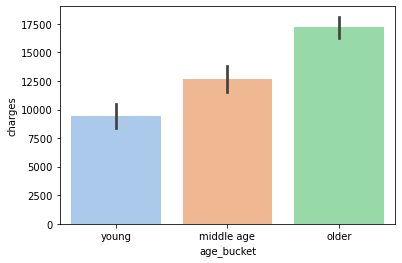

In [61]:
sns.barplot(data=df, x='age_bucket',y='charges')

This looks nice and clean. Let's further breakdown by segments of each age group.

<AxesSubplot:xlabel='age_bucket', ylabel='charges'>

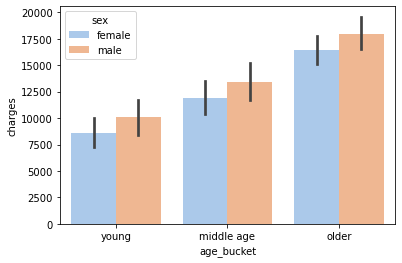

In [62]:
sns.barplot(data=df, x='age_bucket', y='charges', hue='sex')

In each age group, we see that males typically experience higher charges on average then females do.

<AxesSubplot:xlabel='age_bucket', ylabel='charges'>

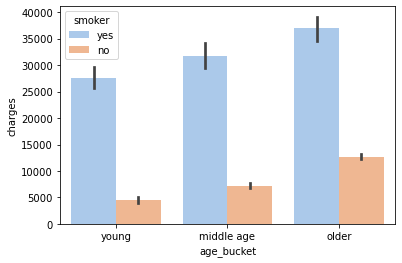

In [63]:
sns.barplot(data=df, x='age_bucket', y='charges', hue='smoker')

This one seems pretty intuitive as well.

<AxesSubplot:xlabel='age_bucket', ylabel='charges'>

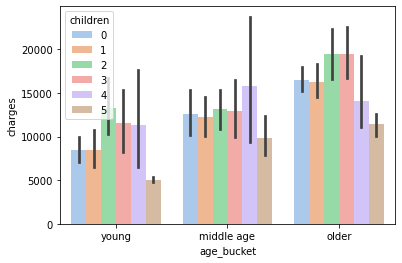

In [64]:
sns.barplot(data=df, x='age_bucket', y='charges', hue='children')

<AxesSubplot:xlabel='age_bucket', ylabel='charges'>

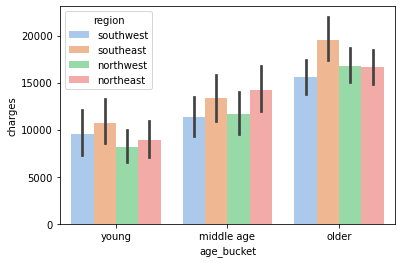

In [65]:
sns.barplot(data=df, x='age_bucket', y='charges', hue='region')

Something interesting to note is the degree of differential between the regions as the age bucket increases, e.g. northwest surpasses northeast in the older age bucket.  Let's take a look at BMI now.

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bucket
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,middle age
4,32,male,28.880,0,no,northwest,3866.85520,middle age


<AxesSubplot:xlabel='bmi', ylabel='charges'>

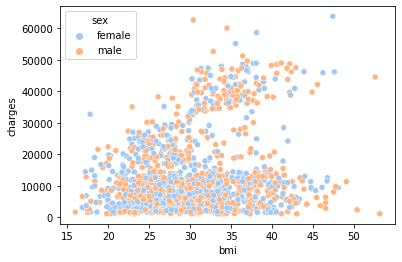

In [67]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

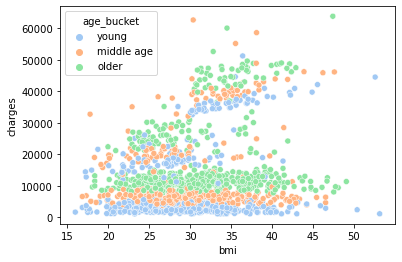

In [68]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='age_bucket')

We see the charges are clearly higher for older people vs middle age, and higher for middle age vs young, across all BMI types.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

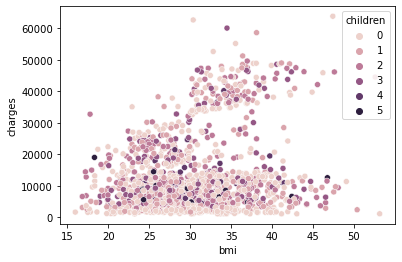

In [69]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='children')

In [70]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Similarly to the age groups, we will now bucket the BMI into low, medium and high, based on the IQR for BMI.

In [71]:
def bmi_bucket(df):
    if df['bmi'] > 34:
        return 'high bmi'
    elif (df['bmi'] <=34) & (df['bmi'] >=26):
        return 'medium bmi'
    else:
        return 'low bmi'

df['bmi bucket'] = df.apply(bmi_bucket, axis=1)

df['bmi bucket'].value_counts()

medium bmi    641
high bmi      380
low bmi       317
Name: bmi bucket, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi bucket', ylabel='count'>

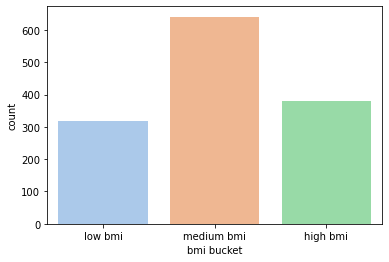

In [72]:
sns.countplot(df['bmi bucket'].sort_values(), order=['low bmi', 'medium bmi', 'high bmi'])

<AxesSubplot:xlabel='sex', ylabel='charges'>

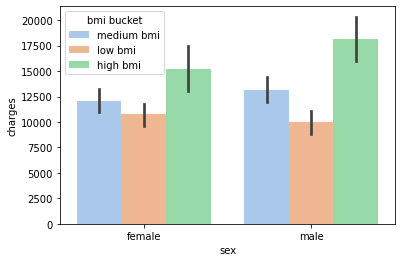

In [73]:
sns.barplot(data=df, x='sex', y='charges', hue='bmi bucket')

Note the greater differential in charges for males of high bmi vs medium bmi compared with the differential between females of high bmi vs females of medium bmi. Let's explore the other features.

<AxesSubplot:xlabel='sex', ylabel='charges'>

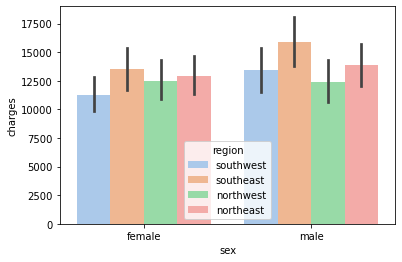

In [74]:
sns.barplot(data=df, x='sex', y='charges', hue='region')

<AxesSubplot:xlabel='sex', ylabel='charges'>

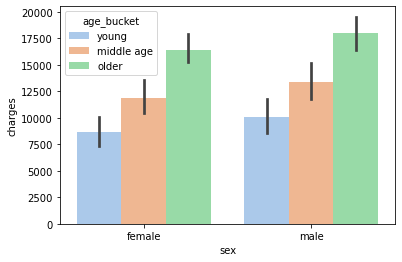

In [75]:
sns.barplot(data=df, x='sex', y='charges', hue='age_bucket')

In [76]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bucket,bmi bucket
0,19,female,27.900,0,yes,southwest,16884.92400,young,medium bmi
1,18,male,33.770,1,no,southeast,1725.55230,young,medium bmi
2,28,male,33.000,3,no,southeast,4449.46200,young,medium bmi
3,33,male,22.705,0,no,northwest,21984.47061,middle age,low bmi
4,32,male,28.880,0,no,northwest,3866.85520,middle age,medium bmi


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='children', ylabel='count'>

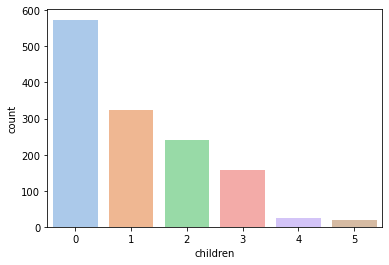

In [77]:
sns.countplot(df['children'])

<AxesSubplot:xlabel='children', ylabel='charges'>

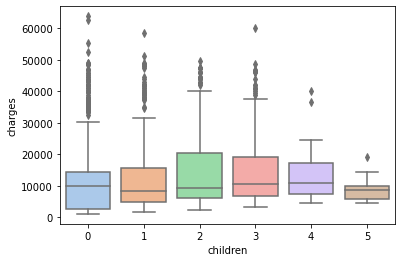

In [78]:
sns.boxplot(data=df, x='children', y='charges')

Let's bucket the number of children as well.

In [79]:
def children_bucket(df):
    if df['children'] == 0:
        return 'no children'
    elif (df['children'] >= 1) & (df['children']<=3):
        return '1-3 children'
    else:
        return '4+ children'
df['children bucket'] = df.apply(children_bucket, axis=1)

In [80]:
df['children bucket'].value_counts()

1-3 children    721
no children     574
4+ children      43
Name: children bucket, dtype: int64

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bucket,bmi bucket,children bucket
0,19,female,27.900,0,yes,southwest,16884.92400,young,medium bmi,no children
1,18,male,33.770,1,no,southeast,1725.55230,young,medium bmi,1-3 children
2,28,male,33.000,3,no,southeast,4449.46200,young,medium bmi,1-3 children
3,33,male,22.705,0,no,northwest,21984.47061,middle age,low bmi,no children
4,32,male,28.880,0,no,northwest,3866.85520,middle age,medium bmi,no children


# Data Preprocessing & Modeling

In [82]:
df_cat = df[['age_bucket', 'sex', 'bmi bucket', 'children bucket', 'smoker', 'region']]
li = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
df_onehot_cat = pd.get_dummies(df_cat, prefix = li)
df_onehot_cat.head()

,age_middle age,age_older,age_young,sex_female,sex_male,bmi_high bmi,bmi_low bmi,bmi_medium bmi,children_1-3 children,children_4+ children,children_no children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [83]:
X=df_onehot_cat
y=df[['charges']]

In [84]:
#feature scaling for charges

#Standard Scaler

sc = StandardScaler()
y = sc.fit_transform(y)

In [85]:
# split data between training and testing datasets using SKLearn's train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [86]:
X_train

,age_middle age,age_older,age_young,sex_female,sex_male,bmi_high bmi,bmi_low bmi,bmi_medium bmi,children_1-3 children,children_4+ children,children_no children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
731,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1
866,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0
202,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
820,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
905,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0
1096,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0
235,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


In [87]:
y_train

array([[-0.24078187],
       [-0.26475678],
       [-1.00194062],
       ...,
       [ 2.59145133],
       [ 0.51000382],
       [-0.14177034]])

In [88]:
y_test

array([[-0.96022527],
       [-0.15837405],
       [-0.36940521],
       [-0.23864749],
       [-0.92250267],
       [ 2.10449502],
       [-0.32759698],
       [-0.13318816],
       [-0.84256133],
       [ 0.51784962],
       [-0.05291201],
       [-0.14307574],
       [-0.57266162],
       [-0.51379852],
       [-1.00226902],
       [-0.35538372],
       [ 0.71984298],
       [-0.56637502],
       [ 1.24055132],
       [ 0.01586865],
       [-0.2930616 ],
       [ 2.28508046],
       [-0.43317188],
       [-0.39865799],
       [-0.91420959],
       [-0.54568126],
       [-0.38529682],
       [-0.41194067],
       [-0.65221544],
       [-0.79512162],
       [-0.13186521],
       [-0.12660157],
       [ 0.95848805],
       [ 1.69178431],
       [ 0.90128659],
       [-0.28143858],
       [ 1.94680715],
       [ 0.38591463],
       [-0.11680744],
       [ 2.18538091],
       [-0.73693539],
       [-0.12609889],
       [ 0.53520872],
       [-0.0762671 ],
       [-0.68884273],
       [ 1

Regression Model 1 - the first model will use only categorical features, including the buckets created from the numerical features.

In [89]:
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
# The coefficients & intercept
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 7.82073515e+12  7.82073515e+12  7.82073515e+12  7.30904531e+12
   7.30904531e+12 -7.62884531e+12 -7.62884531e+12 -7.62884531e+12
   1.38511600e+13  1.38511600e+13  1.38511600e+13 -1.21526156e+14
  -1.21526156e+14 -2.23294957e+12 -2.23294957e+12 -2.23294957e+12
  -2.23294957e+12]]
Intercept:  [1.0240701e+14]


Let's see the performance of our first model.

In [90]:
# training data
regr.score(X_train, y_train)

0.7315975507293486

In [91]:
# testing data

regr.score(X_test, y_test)

0.7453131997965372

Regression Model 2 - the second model will retain the numerical age and bmi variables

In [92]:
df_cat2 = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
df_onehot_cat2 = pd.get_dummies(df_cat2, columns=['sex', 'children', 'smoker', 'region'])
df_onehot_cat2.head()

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.770,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.000,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.705,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,32,28.880,0,1,1,0,0,0,0,0,1,0,0,1,0,0


In [93]:
df_onehot_cat2_temp = df_onehot_cat2[['age', 'bmi']]
df_onehot_cat2_temp2 = df_onehot_cat2.drop(columns=['age', 'bmi'])

df_onehot_cat2_temp = sc.fit_transform(df_onehot_cat2_temp)
df_onehot_cat2_temp = pd.DataFrame(df_onehot_cat2_temp, columns=['age', 'bmi'])
df_onehot_cat2_temp.head()

,age,bmi
0,-1.438764,-0.453320
1,-1.509965,0.509621
2,-0.797954,0.383307
3,-0.441948,-1.305531
4,-0.513149,-0.292556


In [94]:
df_onehot_cat2_temp = pd.concat([df_onehot_cat2_temp, df_onehot_cat2_temp2], axis=1)
df_onehot_cat2_temp

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,-1.509965,0.509621,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,-0.797954,0.383307,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,-0.441948,-1.305531,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,-0.513149,-0.292556,0,1,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1334,-1.509965,0.206139,1,0,1,0,0,0,0,0,1,0,1,0,0,0
1335,-1.509965,1.014878,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1336,-1.296362,-0.797813,1,0,1,0,0,0,0,0,1,0,0,0,0,1


In [95]:
y

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [96]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_onehot_cat2_temp,y,test_size = 0.2, random_state=1)

In [97]:
regr2 = linear_model.LinearRegression()
regr2.fit (X_train2, y_train2)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[ 0.29943241  0.16141112  0.00984247 -0.00984247 -0.08551175 -0.08298604
   0.01900918 -0.01913198  0.15633548  0.01228511 -0.98205386  0.98205386
   0.0479492   0.01444684 -0.03690434 -0.0254917 ]]
Intercept:  [0.63297952]


Let's check how the  second model performed.

In [98]:
# performance of training set

regr2.score(X_train2, y_train2)

0.7486438664081898

In [99]:
# testing set
regr2.score(X_test2, y_test2)

0.7632007319189733

The highest score for my linear regression model came out to .76

I hope you enjoyed my EDA and basic model development on the insurance charges dataset. Any and all feedback would be greatly appreciated!